In [1]:
import mmcci

#### Load stLearn data objects

In [2]:
import pickle

with open('data/brain_data.pkl', 'rb') as f:
    brain_data = pickle.load(f)

In [3]:
samples = []

for i in range(4):
    samples.append(mmcci.CCIData(
        cci_scores=brain_data['brain_aged_tech1_cci'][i],
        p_values=brain_data['brain_aged_tech1_pvals'][i],
        n_spots=brain_data['brain_aged_tech1_sizes'][i],
        platform='visium',
        other_metadata={'age': 'aged'}
        ))
    
for i in range(4):
    samples.append(mmcci.CCIData(
        cci_scores=brain_data['brain_young_tech1_cci'][i],
        p_values=brain_data['brain_young_tech1_pvals'][i],
        n_spots=brain_data['brain_young_tech1_sizes'][i],
        platform='visium',
        other_metadata={'age': 'young'}
        ))
    
for i in range(2):
    samples.append(mmcci.CCIData(
        cci_scores=brain_data['brain_aged_tech2_cci'][i],
        p_values=brain_data['brain_aged_tech2_pvals'][i],
        n_spots=brain_data['brain_aged_tech2_sizes'][i],
        platform='stomics',
        other_metadata={'age': 'aged'}
        ))
    
for i in range(2):
    samples.append(mmcci.CCIData(
        cci_scores=brain_data['brain_young_tech2_cci'][i],
        p_values=brain_data['brain_young_tech2_pvals'][i],
        n_spots=brain_data['brain_young_tech2_sizes'][i],
        platform='stomics',
        other_metadata={'age': 'young'}
        ))

In [4]:
mmcci.io.save_CCIData(samples[0], 'data/brain_aging/aged_visium_1.pkl')
mmcci.io.save_CCIData(samples[1], 'data/brain_aging/aged_visium_2.pkl')
mmcci.io.save_CCIData(samples[2], 'data/brain_aging/aged_visium_3.pkl')
mmcci.io.save_CCIData(samples[3], 'data/brain_aging/aged_visium_4.pkl')
mmcci.io.save_CCIData(samples[4], 'data/brain_aging/young_visium_1.pkl')
mmcci.io.save_CCIData(samples[5], 'data/brain_aging/young_visium_2.pkl')
mmcci.io.save_CCIData(samples[6], 'data/brain_aging/young_visium_3.pkl')
mmcci.io.save_CCIData(samples[7], 'data/brain_aging/young_visium_4.pkl')
mmcci.io.save_CCIData(samples[8], 'data/brain_aging/aged_stomics_1.pkl')
mmcci.io.save_CCIData(samples[9], 'data/brain_aging/aged_stomics_2.pkl')
mmcci.io.save_CCIData(samples[10], 'data/brain_aging/young_stomics_1.pkl')
mmcci.io.save_CCIData(samples[11], 'data/brain_aging/young_stomics_2.pkl')

In [5]:
samples = [
    mmcci.io.load_CCIData('data/brain_aging/aged_visium_1.pkl'),
    mmcci.io.load_CCIData('data/brain_aging/aged_visium_2.pkl'),
    mmcci.io.load_CCIData('data/brain_aging/aged_visium_3.pkl'),
    mmcci.io.load_CCIData('data/brain_aging/aged_visium_4.pkl'),
    mmcci.io.load_CCIData('data/brain_aging/young_visium_1.pkl'),
    mmcci.io.load_CCIData('data/brain_aging/young_visium_2.pkl'),
    mmcci.io.load_CCIData('data/brain_aging/young_visium_3.pkl'),
    mmcci.io.load_CCIData('data/brain_aging/young_visium_4.pkl'),
    mmcci.io.load_CCIData('data/brain_aging/aged_stomics_1.pkl'),
    mmcci.io.load_CCIData('data/brain_aging/aged_stomics_2.pkl'),
    mmcci.io.load_CCIData('data/brain_aging/young_stomics_1.pkl'),
    mmcci.io.load_CCIData('data/brain_aging/young_stomics_2.pkl')
    ]

In [6]:
from matplotlib import pyplot as plt

colors = {
    'Ependymal': '#1f77b4',
    'Astrocytes': '#ff7f0e',
    'Vascular': '#2ca02c',
    'Oligos': '#d62728',
    'Neurons': '#9467bd',
    'Microglia': '#8c564b',
    'Immune': '#e377c2',
    'PeripheralGlia': '#7f7f7f'
    }

#### Normalise each group of samples

In [7]:
for i in range(len(samples)):
    samples[i] = samples[i].scale_by_nspots()
    samples[i] = samples[i].filter_by_p_vals(assay='scaled')
    samples[i] = samples[i].calc_overall(assay='filtered')
    # mmcci.plt.network_plot(samples[i].assays['filtered']['overall'], node_size=2500, edge_weight=50, figsize=(8,8), node_colors=colors, show_labels=False)

#### Integrate within technologies

In [8]:
brain_aged_tech1_integrated = mmcci.it.lr_integration(samples[0:4], method=">=50%", strict=True, assay="scaled", metadata={'platform': 'visium'})
brain_young_tech1_integrated = mmcci.it.lr_integration(samples[4:8], method=">=50%", strict=True, assay="scaled", metadata={'platform': 'visium'})
brain_aged_tech2_integrated = mmcci.it.lr_integration(samples[8:10], method=">=50%", strict=True, assay="scaled", metadata={'platform': 'stomics'})
brain_young_tech2_integrated = mmcci.it.lr_integration(samples[10:12], method=">=50%", strict=True, assay="scaled", metadata={'platform': 'stomics'})

Integrating p values: 100%|██████████| 1253/1253 [00:08<00:00, 152.73it/s]


In [9]:
brain_aged_tech1_integrated = brain_aged_tech1_integrated.filter_by_p_vals().calc_overall(assay='filtered')
brain_young_tech1_integrated = brain_young_tech1_integrated.filter_by_p_vals().calc_overall(assay='filtered')
brain_aged_tech2_integrated = brain_aged_tech2_integrated.filter_by_p_vals().calc_overall(assay='filtered')
brain_young_tech2_integrated = brain_young_tech2_integrated.filter_by_p_vals().calc_overall(assay='filtered')

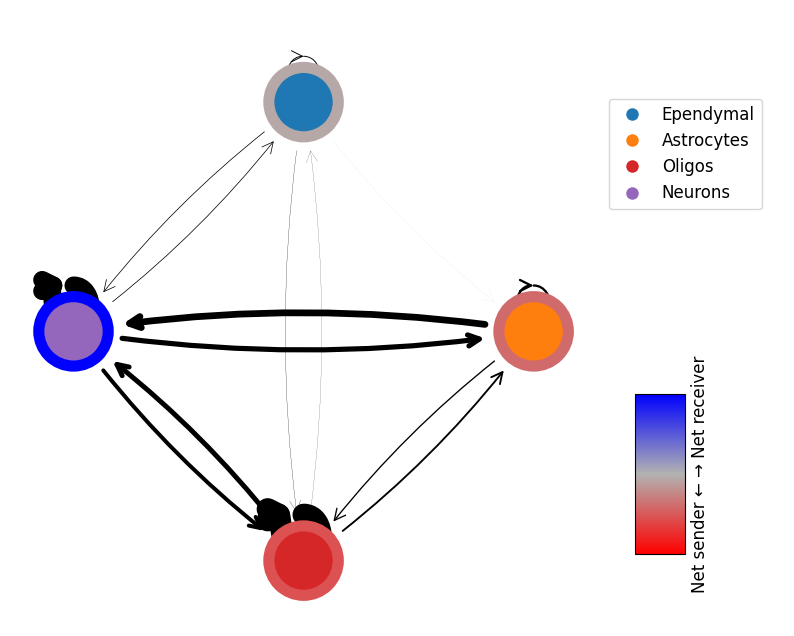

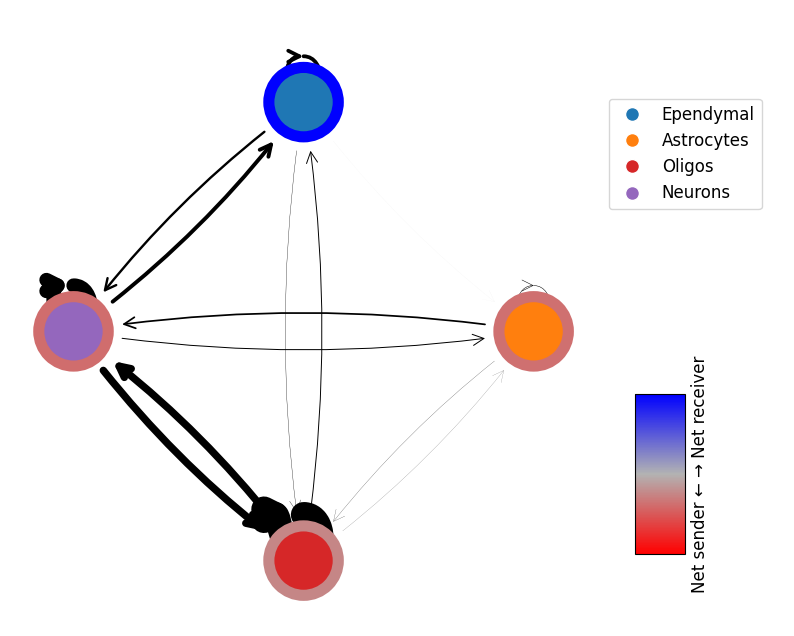

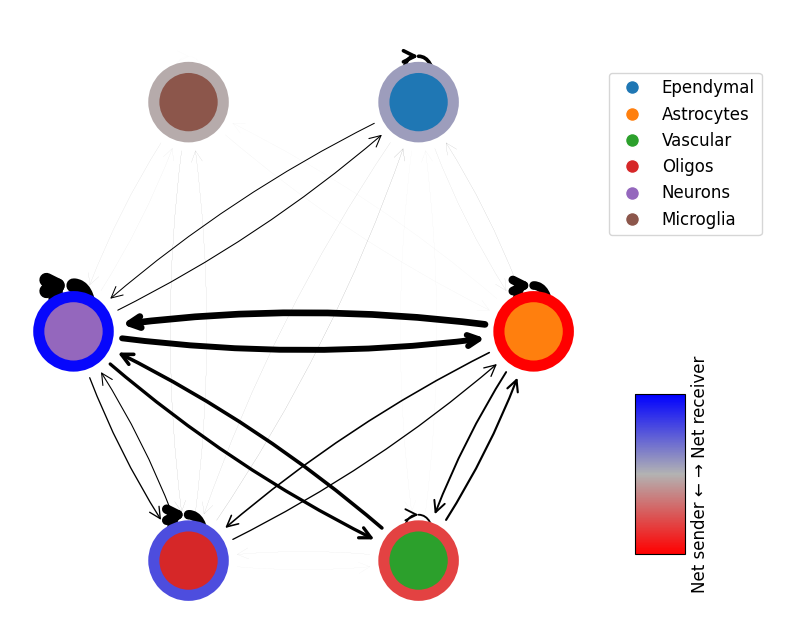

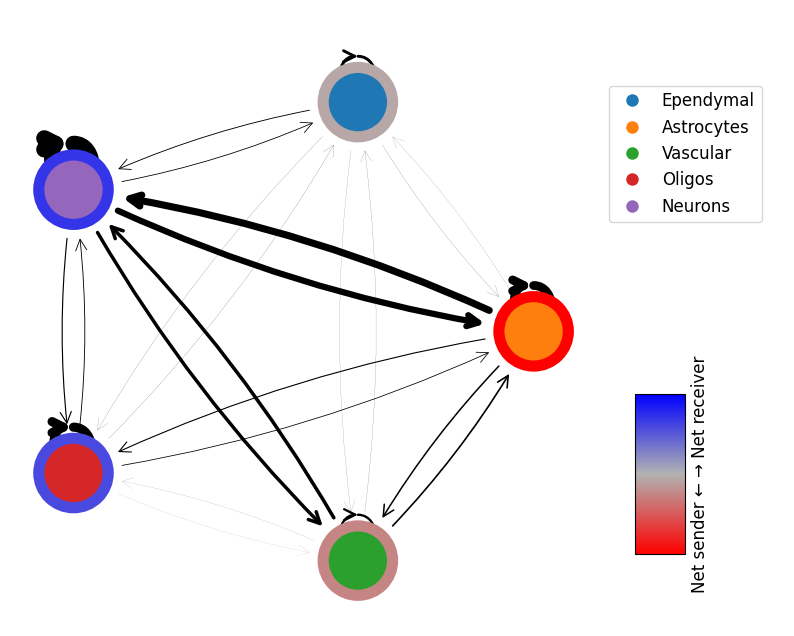

In [10]:
mmcci.plt.network_plot(brain_aged_tech1_integrated.assays['filtered']['overall'], node_size=2500, edge_weight=50, node_colors=colors, show_labels=False)
mmcci.plt.network_plot(brain_young_tech1_integrated.assays['filtered']['overall'], node_size=2500, edge_weight=50, node_colors=colors, show_labels=False)
mmcci.plt.network_plot(brain_aged_tech2_integrated.assays['filtered']['overall'], node_size=2500, edge_weight=50, node_colors=colors, show_labels=False)
mmcci.plt.network_plot(brain_young_tech2_integrated.assays['filtered']['overall'], node_size=2500, edge_weight=50, node_colors=colors, show_labels=False)

#### Normalise samples between technologies

In [11]:
aged_scale_factors = mmcci.it.calc_scale_factors([brain_aged_tech1_integrated, brain_aged_tech2_integrated], assay='raw')
young_scale_factors = mmcci.it.calc_scale_factors([brain_young_tech1_integrated, brain_young_tech2_integrated], assay='raw')

brain_aged_tech1_integrated = brain_aged_tech1_integrated.scale(aged_scale_factors['visium'], assay='raw')
brain_young_tech1_integrated = brain_young_tech1_integrated.scale(young_scale_factors['visium'], assay='raw')
brain_aged_tech2_integrated = brain_aged_tech2_integrated.scale(aged_scale_factors['stomics'], assay='raw')
brain_young_tech2_integrated = brain_young_tech2_integrated.scale(young_scale_factors['stomics'], assay='raw')

#### Integrate between technologies for both groups

In [12]:
aged_integrated = mmcci.it.lr_integration([brain_aged_tech1_integrated, brain_aged_tech2_integrated], method=">50%", strict=True, assay="scaled", metadata={'age': 'aged'})
young_integrated = mmcci.it.lr_integration([brain_young_tech1_integrated, brain_young_tech2_integrated], method=">50%", strict=True, assay="scaled", metadata={'age': 'young'})

Integrating p values: 100%|██████████| 1294/1294 [00:08<00:00, 151.69it/s]


In [13]:
aged_integrated = aged_integrated.filter_by_p_vals().calc_overall(assay='filtered')
young_integrated = young_integrated.filter_by_p_vals().calc_overall(assay='filtered')

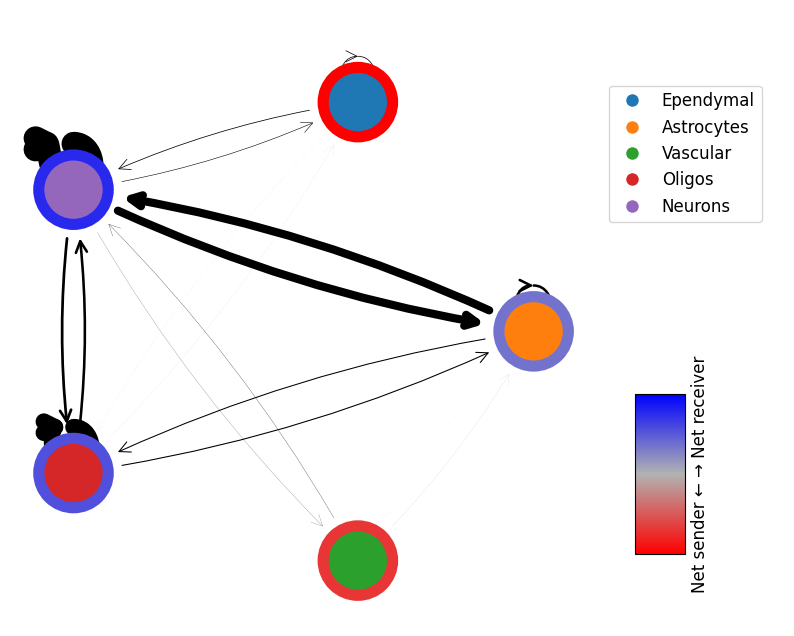

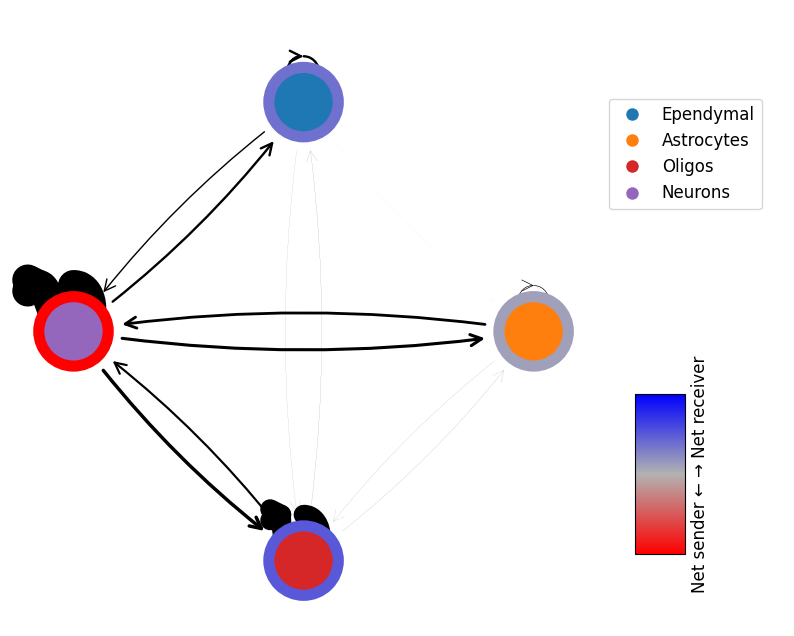

In [14]:
mmcci.plt.network_plot(aged_integrated.assays['filtered']['overall'], node_size=2500, edge_weight=50, node_colors=colors, show_labels=False)
mmcci.plt.network_plot(young_integrated.assays['filtered']['overall'], node_size=2500, edge_weight=50, node_colors=colors, show_labels=False)

#### Rank LR pairs based on dissimilarity between groups

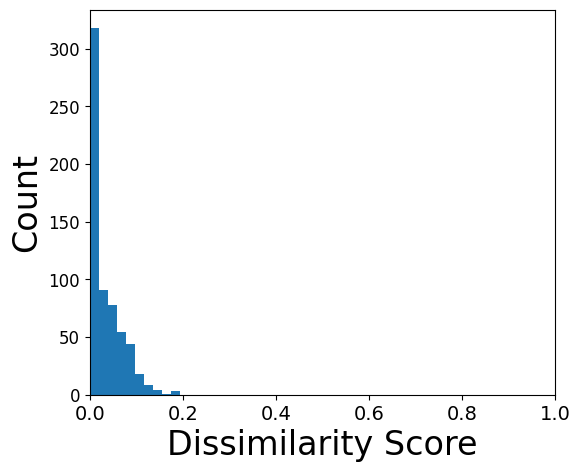

Overall Network Aged vs Young Dissimilarity Score is: 0.23290906762113986


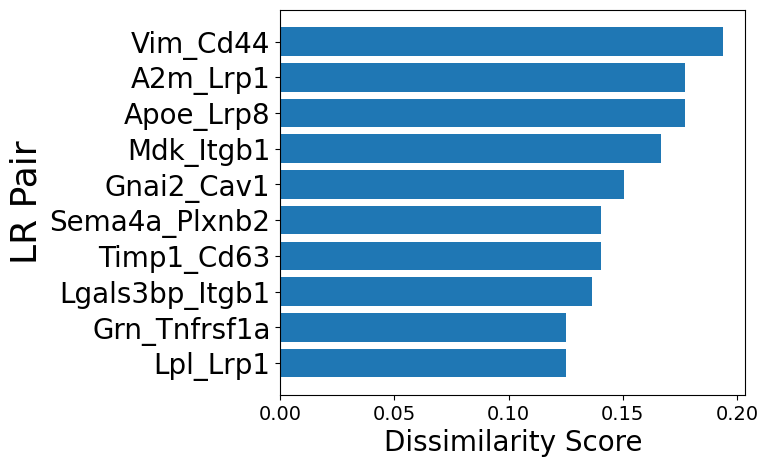

In [15]:
dissimilarity_scores = mmcci.an.calculate_dissim(aged_integrated, young_integrated, assay='filtered')
mmcci.plt.dissim_hist(dissimilarity_scores)
    
## Sort LR Pairs from high to low dissimilarities
print("Overall Network Aged vs Young Dissimilarity Score is: " + str(mmcci.sc.dissimilarity_score(aged_integrated.assays['filtered']['overall'], young_integrated.assays['filtered']['overall'])))

mmcci.plt.lr_top_dissimilarity(dissimilarity_scores, x_label_size=20, y_label_size=26, y_tick_size=20, figsize=(6,5))

#### Plot highly dissimilar pairs between groups

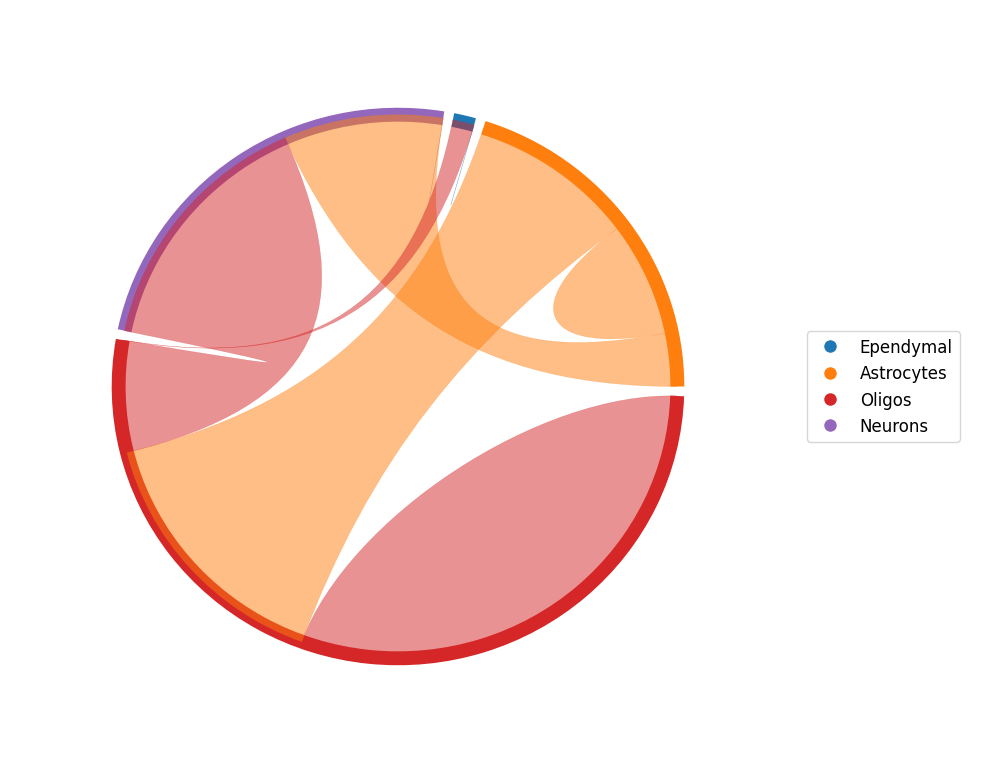

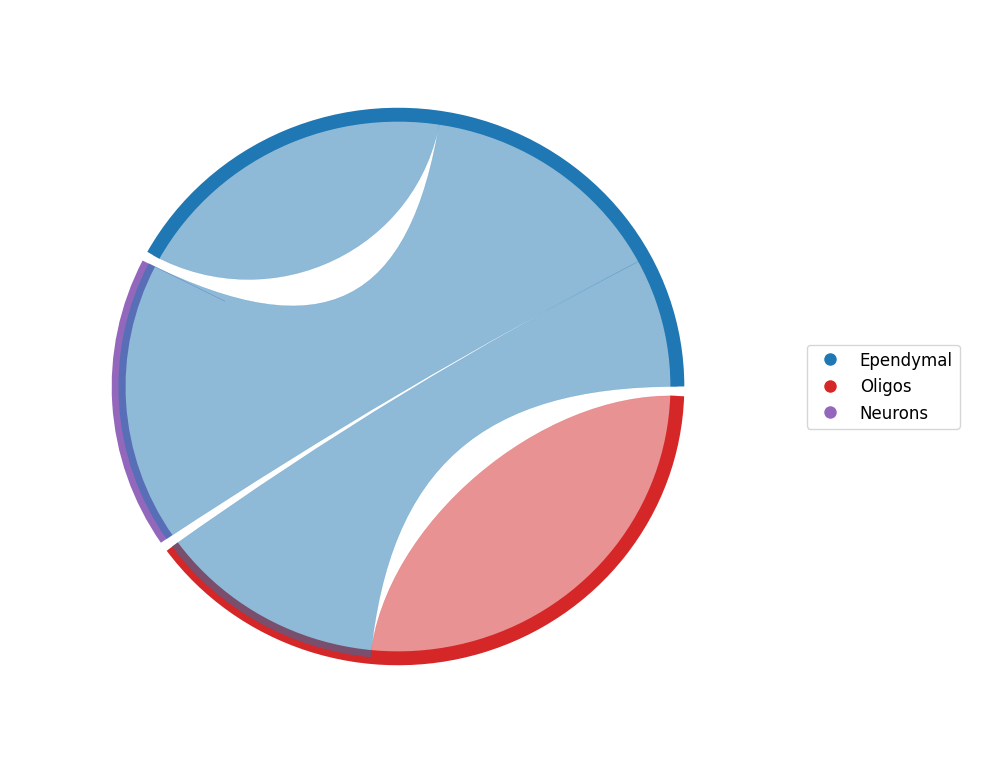

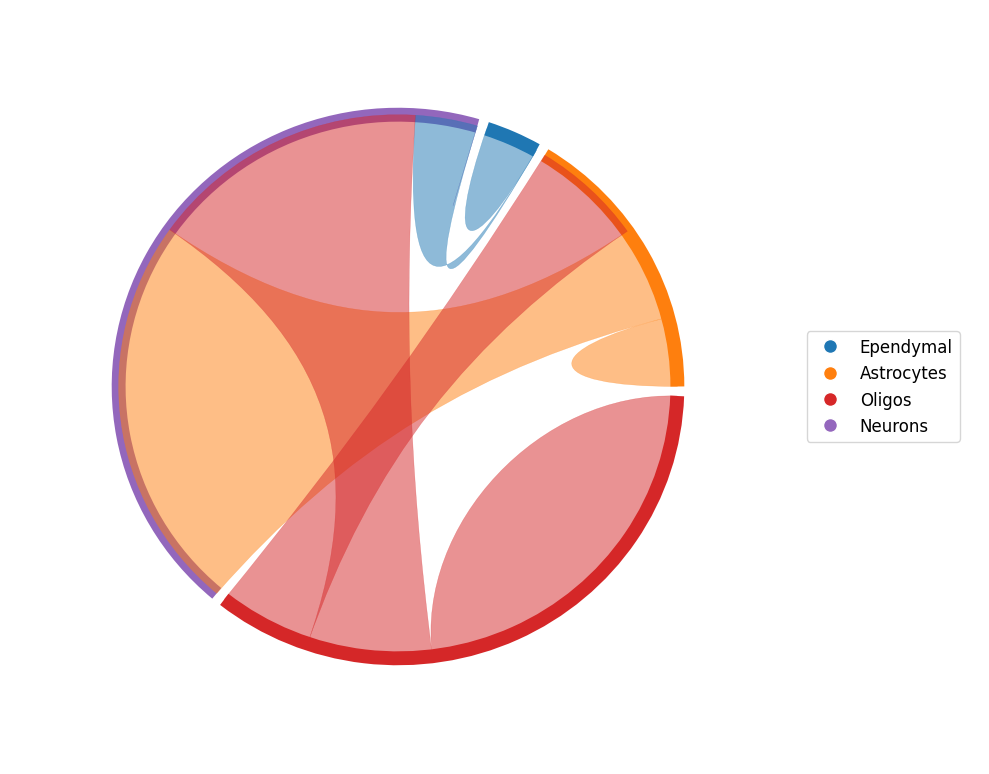

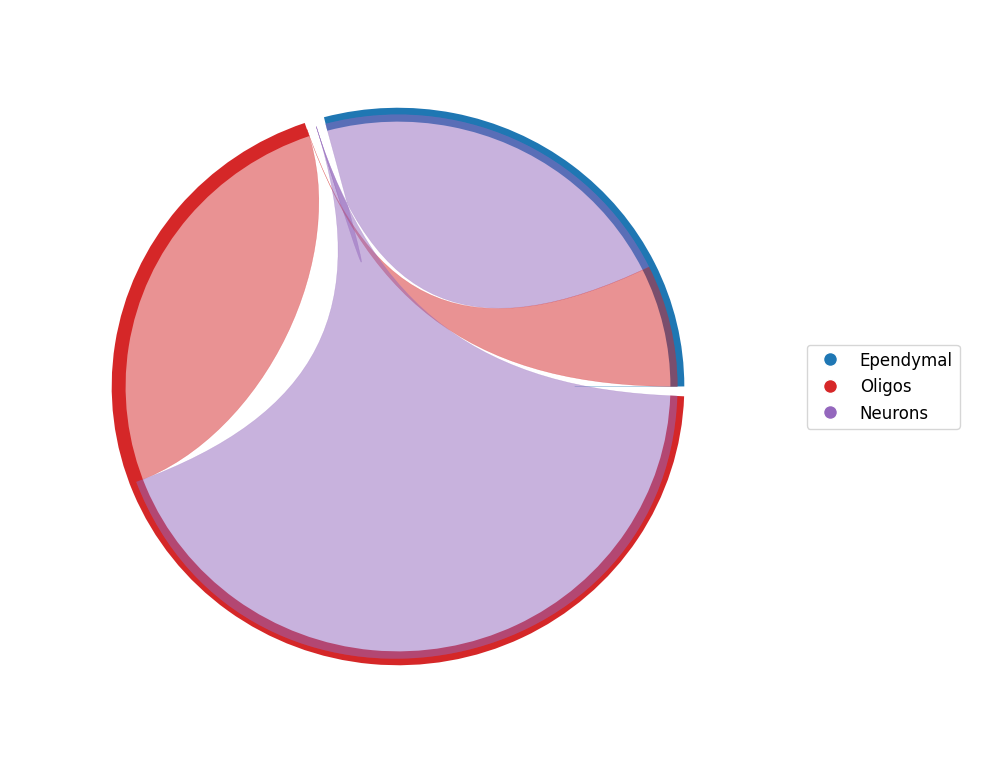

In [ ]:
mmcci.plt.chord_plot(aged_integrated.assays['filtered']['cci_scores']['Vim_Cd44'], colors=colors, label_size=0)
mmcci.plt.chord_plot(young_integrated.assays['filtered']['cci_scores']['Vim_Cd44'], colors=colors, label_size=0)

mmcci.plt.chord_plot(aged_integrated.assays['filtered']['cci_scores']['A2m_Lrp1'], colors=colors, label_size=0)
mmcci.plt.chord_plot(young_integrated.assays['filtered']['cci_scores']['A2m_Lrp1'], colors=colors, label_size=0)

#### Calculate p values for significance changes between groups

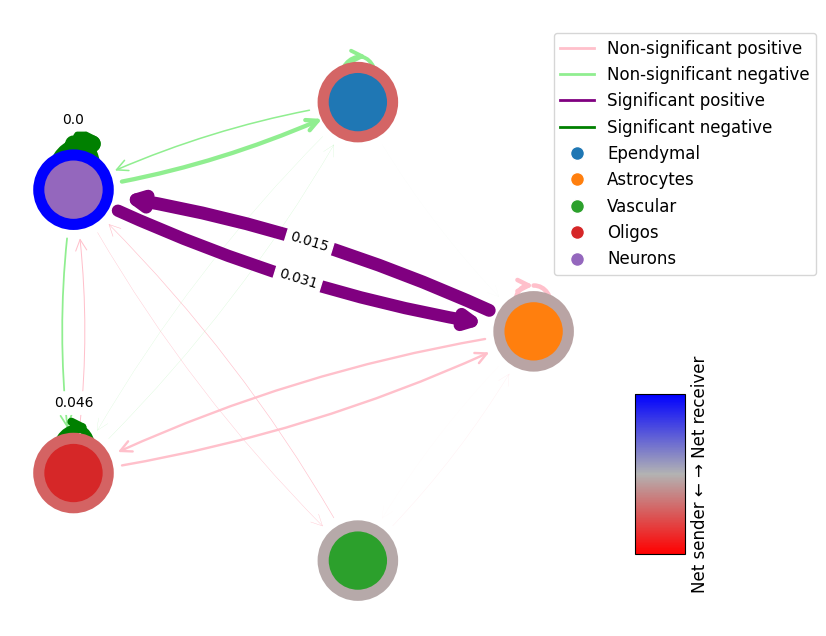

In [17]:
age_diff = mmcci.an.get_network_diff(aged_integrated.assays['filtered']['overall'], young_integrated.assays['filtered']['overall'])
mmcci.plt.network_plot(age_diff['diff'], age_diff['p_vals'], diff_plot=True, show_labels=False, node_size=2500, edge_weight=120, node_colors=colors)

#### Get LR pairs from Astrocytes to Neurons

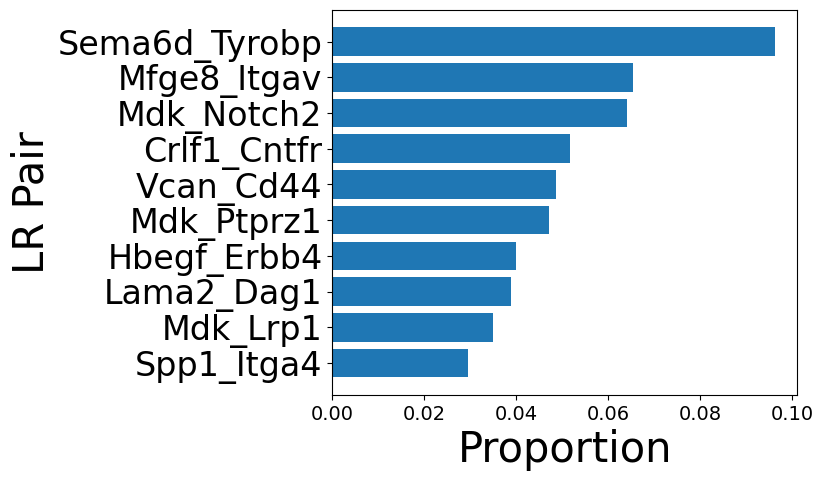

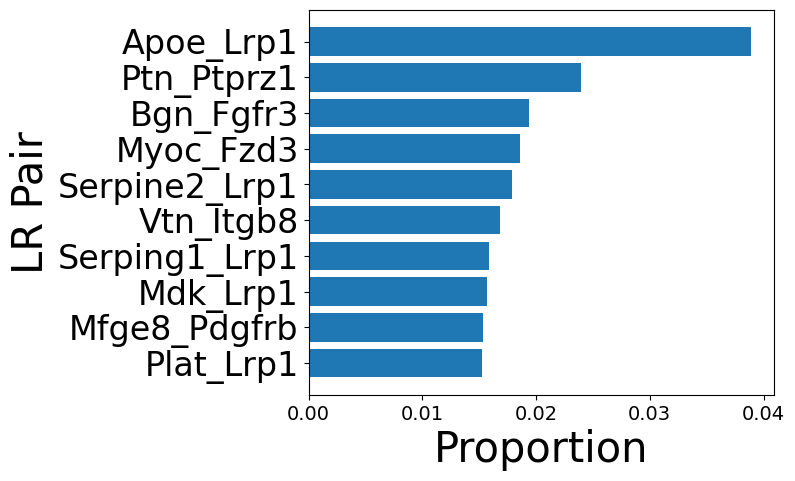

In [18]:
mmcci.plt.lrs_per_celltype(young_integrated, "Astrocytes", "Neurons", assay='filtered', n=10, x_label_size=30, y_label_size=30, y_tick_size=24, figsize=(6,5))
mmcci.plt.lrs_per_celltype(aged_integrated, "Astrocytes", "Neurons", assay='filtered', n=10, x_label_size=30, y_label_size=30, y_tick_size=24, figsize=(6,5))

#### Cluster Aged and Young LR Pairs

Computing Dissimilarity Scores for multiple interactions...


Processing: 100%|██████████| 374/374 [00:39<00:00,  9.59it/s]


Computing Principal Components of weighted graph ...
Performing Clustering and Ranking within clusters...
Computing Dissimilarity Scores for single interactions...


Processing: 100%|██████████| 254/254 [00:18<00:00, 13.51it/s]


Computing Principal Components of weighted graph ...
Performing Clustering and Ranking within clusters...


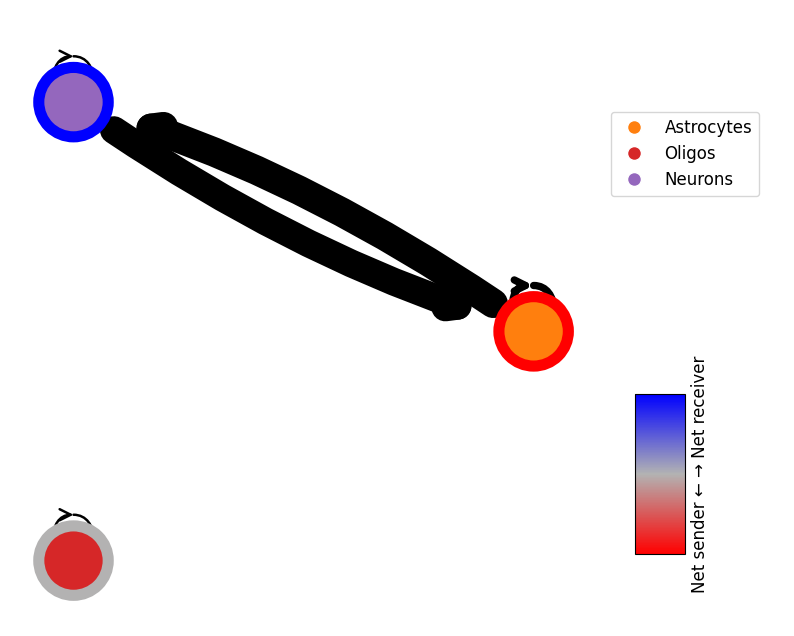

In [19]:
aged_integrated = mmcci.an.cell_network_clustering(aged_integrated, assay='filtered', n_clusters=0)
mmcci.plt.network_plot(aged_integrated.assays['cluster_0']['overall'], node_size=2500, edge_weight=50, node_colors=colors, show_labels=False)

Number of interactions in complement: 50


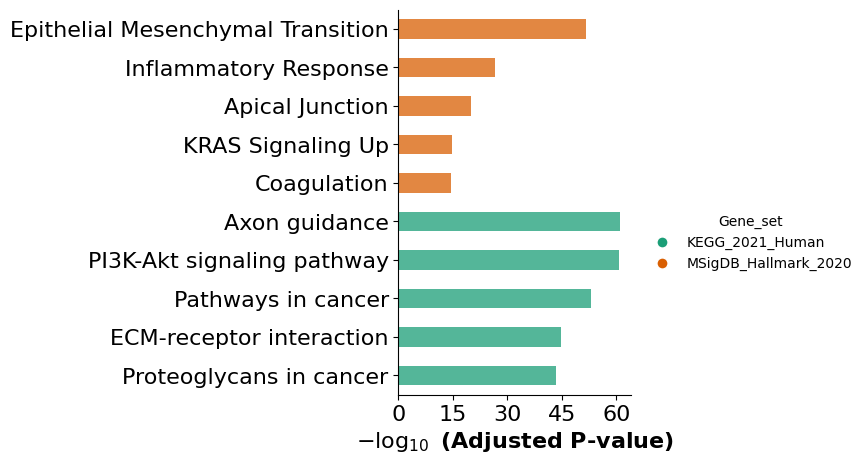

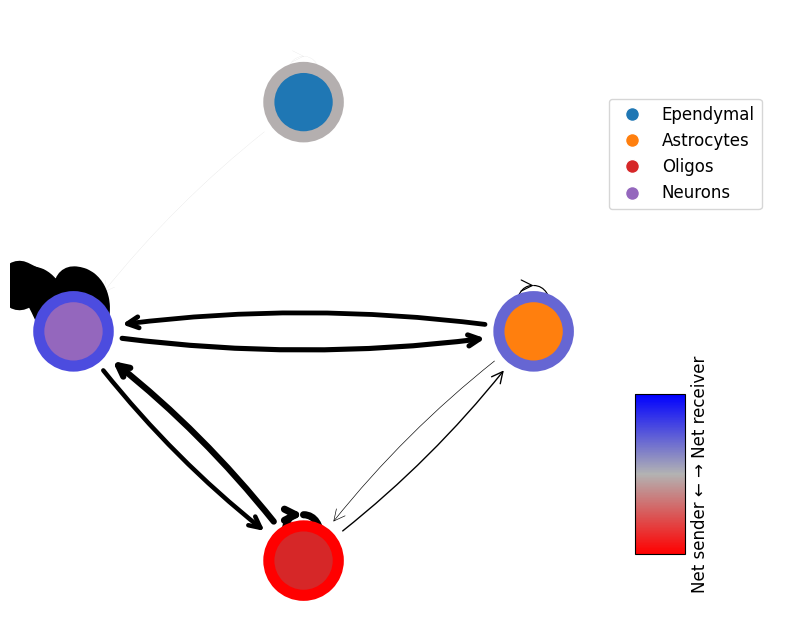

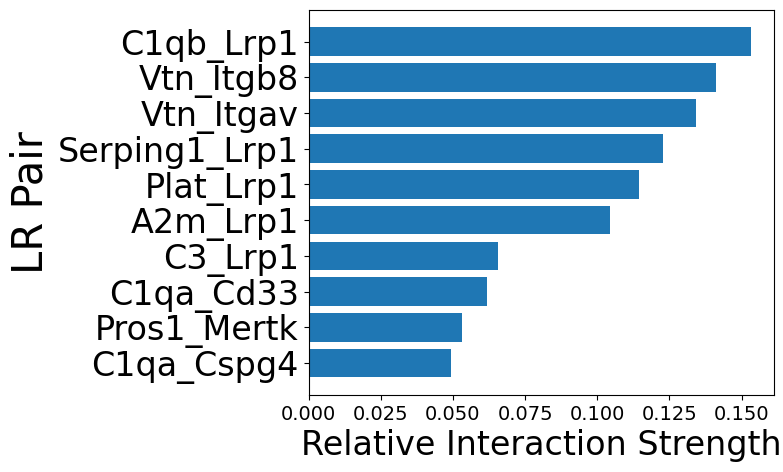

In [21]:
results = mmcci.an.run_gsea(aged_integrated, organism="mouse", gene_sets=["KEGG_2021_Human", "MSigDB_Hallmark_2020"])
grouped = mmcci.an.pathway_subset(aged_integrated, gsea_results=results, terms=["Complement and coagulation cascades"], strict=False, assay_name="complement")
mmcci.plt.network_plot(grouped.assays['complement']['overall'], node_size=2500, edge_weight=50, node_colors=colors)
mmcci.plt.lr_barplot(grouped, assay="complement", n=10, x_label_size=24, y_label_size=30, y_tick_size=24, figsize=(6,5))